Importe de librerías

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=FutureWarning)
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

Carga de datos

In [7]:
Clasificacion = pd.read_excel('Data.xlsx',sheet_name='Datos')
Ventas_cerrado = pd.read_excel('Data.xlsx',sheet_name='Datos mes cerrados')
Ventas_semanales = pd.read_excel('Data.xlsx',sheet_name='Datos_mes_dia')

Exploración

In [8]:
def Descripcion_df(df):
    print('Forma del dataframe ' + str(df.shape))

    df.info()

    Codigos_Unicos =df.apply(lambda x: x['FECHA ASIGNADO']+x['CODIGO'],axis=1).unique().shape
    
    print('Filas unicas ' +str(Codigos_Unicos))

Descripcion_df(Clasificacion)

Forma del dataframe (3913, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FECHA ASIGNADO  3913 non-null   object
 1   CODIGO          3913 non-null   object
 2   CATEGORIA       3913 non-null   object
 3   LINEA           3913 non-null   object
 4   CALIFICACION    3913 non-null   object
dtypes: object(5)
memory usage: 153.0+ KB
Filas unicas (3913,)


In [9]:
Descripcion_df(Ventas_cerrado)

Forma del dataframe (4165, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA ASIGNADO       4165 non-null   object 
 1   CODIGO               4165 non-null   object 
 2   CONTRIBUCION-2       4165 non-null   float64
 3   ORDENES DE PEDIDO-2  4165 non-null   float64
 4   UNIDADES VENDIDAS-2  4165 non-null   float64
 5   CONTRIBUCION-3       4165 non-null   float64
 6   ORDENES DE PEDIDO-3  4165 non-null   float64
 7   UNIDADES VENDIDAS-3  4165 non-null   float64
dtypes: float64(6), object(2)
memory usage: 260.4+ KB
Filas unicas (4165,)


In [10]:
Ventas_cerrado.head()

,FECHA ASIGNADO,CODIGO,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3
0,2023-11,X548,1.000000,1.000000,1.000000,0.709625,0.780037,0.573626
1,2023-11,X160,0.402240,0.330869,0.314286,0.316937,0.297597,0.217582
2,2023-11,X848,0.308432,0.402957,0.309890,0.178797,0.134935,0.114286
3,2023-11,X231,0.199239,0.319778,0.237363,0.200751,0.218115,0.184615
4,2023-11,X429,0.343280,0.253235,0.169231,0.275769,0.133087,0.118681


In [11]:
Descripcion_df(Ventas_semanales)

Forma del dataframe (16663, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16663 entries, 0 to 16662
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             16663 non-null  object 
 1   FECHA              16663 non-null  object 
 2   FECHA ASIGNADO     16663 non-null  object 
 3   Semana de Fecha    16663 non-null  object 
 4   CONTRIBUCION       16663 non-null  float64
 5   ORDENES DE PEDIDO  16663 non-null  float64
 6   UNIDADES VENDIDAS  16663 non-null  float64
dtypes: float64(3), object(4)
memory usage: 911.4+ KB


Filas unicas (4674,)


In [12]:
Ventas_semanales.head()

,CODIGO,FECHA,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS
0,X548,2023-06,2023-07,Semana 23,0.145135,0.120148,0.057143
1,X548,2023-06,2023-07,Semana 24,0.277133,0.177449,0.224176
2,X548,2023-06,2023-07,Semana 25,0.158138,0.160813,0.072527
3,X548,2023-06,2023-07,Semana 26,0.246683,0.223660,0.182418
4,X548,2023-06,2023-07,Semana 27,0.246299,0.136784,0.195604


In [13]:
meses_por_referencias = Clasificacion.groupby(['FECHA ASIGNADO','CALIFICACION'])[['CODIGO']].count().reset_index()
pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO')

FECHA ASIGNADO,2023-07,2023-08,2023-09,2023-10,2023-11
CALIFICACION,,,,,
ESTRELLA,127,120,118,117,116
IMAGEN,22,24,20,19,15
INTERROGANTE,524,571,614,615,629
PROTECTOR,44,49,42,57,70


In [14]:
meses_por_referencias.head()

,FECHA ASIGNADO,CALIFICACION,CODIGO
0,2023-07,ESTRELLA,127
1,2023-07,IMAGEN,22
2,2023-07,INTERROGANTE,524
3,2023-07,PROTECTOR,44
4,2023-08,ESTRELLA,120


In [15]:
pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO')/pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO').sum()

FECHA ASIGNADO,2023-07,2023-08,2023-09,2023-10,2023-11
CALIFICACION,,,,,
ESTRELLA,0.177127,0.157068,0.148615,0.144802,0.139759
IMAGEN,0.030683,0.031414,0.025189,0.023515,0.018072
INTERROGANTE,0.730823,0.747382,0.773300,0.761139,0.757831
PROTECTOR,0.061367,0.064136,0.052897,0.070545,0.084337


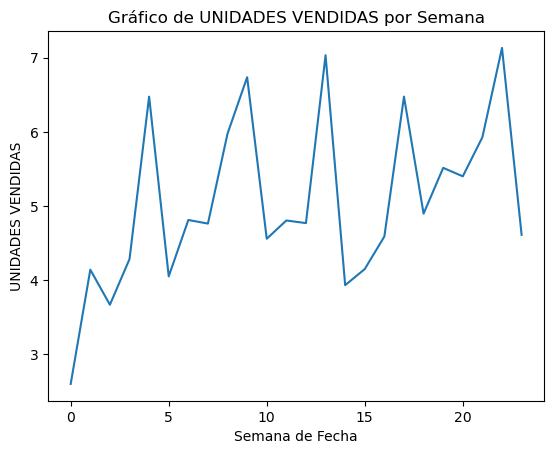

In [16]:
Datos_de_venta_por_semana = Ventas_semanales.groupby('Semana de Fecha')[['CONTRIBUCION','ORDENES DE PEDIDO','UNIDADES VENDIDAS']].sum().reset_index()
Datos_de_venta_por_semana

def graficar(df,medida):
    plt.plot(df[medida])
    plt.xlabel('Semana de Fecha')
    plt.ylabel(medida)  # Añadí la etiqueta del eje y para mayor claridad
    plt.title(f'Gráfico de {medida} por Semana')
    plt.show()
graficar(Datos_de_venta_por_semana,'UNIDADES VENDIDAS')

Procesamiento de archivos

In [17]:
Ventas_Procesadas = Ventas_semanales.merge(Ventas_cerrado,how='left',on=['FECHA ASIGNADO','CODIGO'])
Ventas_Procesadas = Ventas_Procesadas.merge(Clasificacion,how='left',on=['FECHA ASIGNADO','CODIGO'])
Ventas_Procesadas.set_index('CODIGO',inplace=True)
Ventas_Procesadas.drop(columns='FECHA',inplace=True)
Ventas_Procesadas.head()

,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
CODIGO,,,,,,,,,,,,,,
X548,2023-07,Semana 23,0.145135,0.120148,0.057143,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 24,0.277133,0.177449,0.224176,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 25,0.158138,0.160813,0.072527,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 26,0.246683,0.223660,0.182418,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 27,0.246299,0.136784,0.195604,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA


Transformacion de semanas

In [18]:
Ventas_Procesadas['Semana de Fecha'] = Ventas_Procesadas['Semana de Fecha'].apply(lambda x: int(x[-2:]))
Ventas_Procesadas = Ventas_Procesadas.sort_values(by='Semana de Fecha',ascending=True)
Ventas_Procesadas.head()

Diccionario_semanas_transformacion = {}

for mes in Ventas_Procesadas['FECHA ASIGNADO'].unique():
    Auxiliar = Ventas_Procesadas[Ventas_Procesadas['FECHA ASIGNADO']==mes]
    Semanas = Auxiliar['Semana de Fecha'].unique()
    Semana_nueva = np.arange(0,Semanas.shape[0],1)
    for indice in Semana_nueva:
        Diccionario_semanas_transformacion[Semanas[indice]]=Semana_nueva[indice]+1
Ventas_Procesadas['Semana de Fecha'] = Ventas_Procesadas['Semana de Fecha'].apply(lambda x: Diccionario_semanas_transformacion[x])
Ventas_Procesadas.head(3)

,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
CODIGO,,,,,,,,,,,,,,
X548,2023-07,1,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X386,2023-07,1,0.109041,0.000000,0.006593,0.136402,0.018484,0.019780,0.117994,0.003697,0.006593,C2,S2,IMAGEN
X420,2023-07,1,0.111932,0.000000,0.006593,0.142416,0.007394,0.008791,0.152477,0.012939,0.013187,C2,S8,INTERROGANTE


Eliminación de meses con datos faltantes

In [19]:
Ventas_Procesadas = Ventas_Procesadas.dropna()
Ventas_Procesadas.head(3)

,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
CODIGO,,,,,,,,,,,,,,
X548,2023-07,1,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X386,2023-07,1,0.109041,0.000000,0.006593,0.136402,0.018484,0.019780,0.117994,0.003697,0.006593,C2,S2,IMAGEN
X420,2023-07,1,0.111932,0.000000,0.006593,0.142416,0.007394,0.008791,0.152477,0.012939,0.013187,C2,S8,INTERROGANTE


Codificación One-hot

In [20]:
Ventas_Procesadas = pd.get_dummies(Ventas_Procesadas,columns=['FECHA ASIGNADO','CATEGORIA','LINEA'],drop_first=True,dtype=float)
Ventas_Procesadas = pd.get_dummies(Ventas_Procesadas,columns=['CALIFICACION'],dtype=float)

Ventas_Procesadas.head(2)

,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,...,LINEA_S4,LINEA_S5,LINEA_S6,LINEA_S7,LINEA_S8,LINEA_S9,CALIFICACION_ESTRELLA,CALIFICACION_IMAGEN,CALIFICACION_INTERROGANTE,CALIFICACION_PROTECTOR
CODIGO,,,,,,,,,,,,,,,,,,,,,
X548,1,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
X386,1,0.109041,0.000000,0.006593,0.136402,0.018484,0.019780,0.117994,0.003697,0.006593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Separación en set de train y test

In [21]:
X =Ventas_Procesadas.iloc[:,:-4]
y = Ventas_Procesadas.iloc[:,-4:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,...,LINEA_S16,LINEA_S17,LINEA_S2,LINEA_S3,LINEA_S4,LINEA_S5,LINEA_S6,LINEA_S7,LINEA_S8,LINEA_S9
CODIGO,,,,,,,,,,,,,,,,,,,,,
X505,1,0.103130,0.000000,0.004396,0.183957,0.049908,0.048352,0.211271,0.035120,0.059341,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
X732,3,0.103384,0.003697,0.004396,0.126854,0.007394,0.010989,0.125792,0.009242,0.010989,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
X757,4,0.129395,0.016636,0.026374,0.123731,0.016636,0.015385,0.105809,0.020333,0.008791,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
X514,2,0.119899,0.001848,0.008791,0.128729,0.009242,0.008791,0.150085,0.014787,0.017582,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
X758,4,0.112727,0.033272,0.010989,0.304990,0.114603,0.085714,0.203566,0.085028,0.046154,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Rebalanceo de muestras

In [23]:
sm = SMOTE()  #Smote con parámetros por default
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train.to_numpy(), y_train.to_numpy())

# Imprime las formas para verificar
print("Forma de X_train antes de SMOTE:", X_train.shape)
print("Forma de X_train después de SMOTE:", X_train_resampled.shape)

Forma de X_train antes de SMOTE: (10905, 32)
Forma de X_train después de SMOTE: (27988, 32)


In [24]:
y_train.sum(axis=0)

CALIFICACION_ESTRELLA        2523.0
CALIFICACION_IMAGEN           388.0
CALIFICACION_INTERROGANTE    6997.0
CALIFICACION_PROTECTOR        997.0
dtype: float64

In [25]:
y_train_resampled.sum(axis=0)

array([6997, 6997, 6997, 6997])

Modelos

In [51]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiohttp                       3.8.6
aiohttp-retry                 2.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.12.1
amqp                          5.1.1
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
aniso8601                     9.0.1
annotated-types               0.5.0
ansi2html                     1.8.0
antlr4-python3-runtime        4.9.3
anyio                         3.5.0
appdirs                       1.4.4
apyori                        1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.3
asyncssh   

In [35]:
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones
y_pred = model.predict(X_test.to_numpy())

# Calcular la precisión
accuracy = accuracy_score(y_test.to_numpy(), y_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.9523285661899523


In [ ]:
report_dict = classification_report(y_test.to_numpy(), y_pred, output_dict=True)

# Acceder a los datos por clase
for clase, metricas in report_dict.items():
    if clase.isnumeric():
        print(f'Clase: {int(clase)}')
    else:
        print(f'Clase: {clase}')
    print(f'Precisión: {metricas["precision"]}')
    print(f'Recall: {metricas["recall"]}')
    print(f'F1-Score: {metricas["f1-score"]}')
    print(f'Support: {metricas["support"]}')
    print('\n')

In [49]:
model = MultiOutputClassifier(GradientBoostingClassifier())

# Entrena el modelo
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test.to_numpy())

# Calcular la precisión
accuracy = accuracy_score(y_test.to_numpy(), y_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.8624862486248625


In [ ]:
# Importe el conjunto de datos de diabetes y divídalo en entrenamiento y prueba usando scikit-learn

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# defina el servidor para llevar el registro de modelos y artefactos
#mlflow.set_tracking_uri('http://localhost:5000')
# registre el experimento
experiment = mlflow.set_experiment("sklearn-ej")

# Aquí se ejecuta MLflow sin especificar un nombre o id del experimento. MLflow los crea un experimento para este cuaderno por defecto y guarda las características del experimento y las métricas definidas. 
# Para ver el resultado de las corridas haga click en Experimentos en el menú izquierdo. 
with mlflow.start_run(experiment_id=experiment.experiment_id):
    # defina los parámetros del modelo
    n_estimators = 200 
    max_depth = 6
    max_features = 4
    # Cree el modelo con los parámetros definidos y entrénelo
    rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
    rf.fit(X_train, y_train)
    # Realice predicciones de prueba
    predictions = rf.predict(X_test)
  
    # Registre los parámetros
    mlflow.log_param("num_trees", n_estimators)
    mlflow.log_param("maxdepth", max_depth)
    mlflow.log_param("max_feat", max_features)
  
    # Registre el modelo
    mlflow.sklearn.log_model(rf, "random-forest-model")
  
    # Cree y registre la métrica de interés
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)
    print(mse)